# Web Scraping com Python

## Entendo estrutura de uma página na web (html)

- Páginas da internet são arquivos `.html`
- O conteúdo das páginas são separadas por blocos (tags)
- Dentro de cada bloco é que se encontram as informações de interesse

Tags mais comuns:
- `<h1>`
- `<h2>`
- `<h3>`
- `<p>`
- `<div>`
- `<a>`
- `<table>`
    - `<tr>`
    - `<th>`
    - `<td>`

## Scraping simples

In [4]:
from bs4 import BeautifulSoup

In [5]:
soup = BeautifulSoup(open('scraping.html'), 'html.parser')

In [6]:
soup

<!-- This html block marks the beginning of my html file-->
<html>
<!-- The head block may contain some configuration and or information about my web page-->
<head>
<!-- The style tag let us change how our page looks like-->
<style>
    h1 {text-align: center;}

    h2 {text-align: center;}

    h3 {text-align: center;}

    p {text-align: center;}

    div {text-align: center; font-size:x-large;}

    table {margin-left:auto; margin-right:auto; width:50%}

    .my_table, td, tr {border: 1px solid rgba(236, 0, 0, 0.74);}
  </style>
<!-- The title changes the title of the page. The title appear on the tab-->
<title> Simple Scraping Page</title>
</head>
<!--On the body block is the main content-->
<body>
<!-- The img tag allows the insertion of local images-->
<img alt="Le Wagon Logo" height="60" src="lewagon.png" width="60"/>
<!-- The h1 is a header 1 tag-->
<h1>This is a simple scraping page!</h1>
<!-- The h2 is a second header tag-->
<h2>Welcome to this workshop</h2>
<h3>Web Scraping 

In [10]:
soup.find('div')

<div>Now look at this table:

    <!-- The table tag allows the creation of tables. tr is for table row, th for
    table heading and td for table data-->
<table class="my_table">
<tr>
<th>Student Name</th>
<th>Age</th>
<th>Course</th>
</tr>
<tr>
<td style="text-align:center">John</td>
<td style="text-align:center">66</td>
<td style="text-align:center">Data Science</td>
</tr>
<tr>
<td style="text-align:center">Josh</td>
<td style="text-align:center">22</td>
<td style="text-align:center">Web Dev</td>
</tr>
<tr>
<td style="text-align:center">Mary</td>
<td style="text-align:center">32</td>
<td style="text-align:center">Data Science</td>
</tr>
<tr>
<td style="text-align:center">Rachel</td>
<td style="text-align:center">41</td>
<td style="text-align:center">Data Science</td>
</tr>
<tr>
<td style="text-align:center">Stella</td>
<td style="text-align:center">57</td>
<td style="text-align:center">Web Dev</td>
</tr>
</table>
</div>

In [12]:
soup.find(class_='my_table')

<table class="my_table">
<tr>
<th>Student Name</th>
<th>Age</th>
<th>Course</th>
</tr>
<tr>
<td style="text-align:center">John</td>
<td style="text-align:center">66</td>
<td style="text-align:center">Data Science</td>
</tr>
<tr>
<td style="text-align:center">Josh</td>
<td style="text-align:center">22</td>
<td style="text-align:center">Web Dev</td>
</tr>
<tr>
<td style="text-align:center">Mary</td>
<td style="text-align:center">32</td>
<td style="text-align:center">Data Science</td>
</tr>
<tr>
<td style="text-align:center">Rachel</td>
<td style="text-align:center">41</td>
<td style="text-align:center">Data Science</td>
</tr>
<tr>
<td style="text-align:center">Stella</td>
<td style="text-align:center">57</td>
<td style="text-align:center">Web Dev</td>
</tr>
</table>

In [13]:
soup.find(class_='my_table').find('td')

<td style="text-align:center">John</td>

In [14]:
soup.find(class_='my_table').find('td').text

'John'

In [15]:
soup.find_all('td')

[<td style="text-align:center">John</td>,
 <td style="text-align:center">66</td>,
 <td style="text-align:center">Data Science</td>,
 <td style="text-align:center">Josh</td>,
 <td style="text-align:center">22</td>,
 <td style="text-align:center">Web Dev</td>,
 <td style="text-align:center">Mary</td>,
 <td style="text-align:center">32</td>,
 <td style="text-align:center">Data Science</td>,
 <td style="text-align:center">Rachel</td>,
 <td style="text-align:center">41</td>,
 <td style="text-align:center">Data Science</td>,
 <td style="text-align:center">Stella</td>,
 <td style="text-align:center">57</td>,
 <td style="text-align:center">Web Dev</td>]

In [19]:
soup.find_all('td')[2].text

'Data Science'

## Scraping `http://books.toscrape.com/`

In [20]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [21]:
response = requests.get('http://books.toscrape.com/')

In [22]:
soup = BeautifulSoup(response.content, 'html.parser')

In [25]:
soup.title

<title>
    All products | Books to Scrape - Sandbox
</title>

### Título

In [28]:
soup.find('article', class_='product_pod')

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [29]:
soup.find('article', class_='product_pod').h3

<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>

In [30]:
soup.find('article', class_='product_pod').h3.find('a')

<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [33]:
soup.find('article', class_='product_pod').h3.find('a').text

'A Light in the ...'

In [32]:
soup.find('article', class_='product_pod').h3.find('a')['title']

'A Light in the Attic'

### Preço

In [34]:
soup.find('p', class_='price_color')

<p class="price_color">£51.77</p>

In [36]:
preco = soup.find('p', class_='price_color').text
preco

'£51.77'

In [37]:
type(preco)

str

In [38]:
preco.replace('£', '')

'51.77'

In [41]:
float(preco.replace('£', ''))

51.77

### Avaliação

In [42]:
soup.find('article')

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [43]:
soup.find('article').p

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [46]:
soup.find('article').p.text

'\n\n\n\n\n\n'

In [45]:
soup.find('article').p['class']

['star-rating', 'Three']

In [47]:
soup.find('article').p['class'][1]

'Three'

### Todos os livros

In [51]:
livros = soup.find_all('article', class_='product_pod')

In [52]:
len(livros)

20

In [54]:
for livro in livros:
    print(livro)
    print('-'*100)

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>
----------------------------------------------------------------------------------------------------
<article class="product_pod">
<div class="image_container">
<a href="catalogue/tip

In [ ]:
# soup.find('article', class_='product_pod').h3.find('a')['title']
# soup.find('p', class_='price_color').text
# soup.find('article').p['class'][1]

In [69]:
my_dic = {'name': 'John', 'age': 66}

In [73]:
my_dic['name']

'John'

In [74]:
livros_dict = {'Título': [], 'Avaliação': [], 'Preço': []}

for livro in livros:
    titulo = livro.h3.a['title']
    avaliacao = livro.p['class'][1]
    preco = float(livro.find('p', class_='price_color').text.replace('£', ''))
    livros_dict['Título'].append(titulo)
    livros_dict['Avaliação'].append(avaliacao)
    livros_dict['Preço'].append(preco)


In [76]:
livros_dict

{'Título': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Avaliação': ['Three',
  'One',
  'One',
  'Four',
  'Five',
  'One',
  'Four',
  'Three',
  'Four',
  'One',
  'Two',
  'Four',
  'Five',
  'Five',
  'Five',
  

In [77]:
livros_dict['Avaliação']

['Three',
 'One',
 'One',
 'Four',
 'Five',
 'One',
 'Four',
 'Three',
 'Four',
 'One',
 'Two',
 'Four',
 'Five',
 'Five',
 'Five',
 'Three',
 'One',
 'One',
 'Two',
 'Two']

## Data Science

### Preço médio por avaliação

In [78]:
df = pd.DataFrame(livros_dict)

In [79]:
df

,Título,Avaliação,Preço
0,A Light in the Attic,Three,51.77
1,Tipping the Velvet,One,53.74
2,Soumission,One,50.10
3,Sharp Objects,Four,47.82
4,Sapiens: A Brief History of Humankind,Five,54.23
5,The Requiem Red,One,22.65
6,The Dirty Little Secrets of Getting Your Dream...,Four,33.34
7,The Coming Woman: A Novel Based on the Life of...,Three,17.93
8,The Boys in the Boat: Nine Americans and Their...,Four,22.60
9,The Black Maria,One,52.15


In [80]:
df.groupby('Avaliação').mean()

,Preço
Avaliação,
Five,39.750000
Four,31.105000
One,40.018333
Three,42.316667
Two,36.830000


<AxesSubplot:xlabel='Avaliação'>

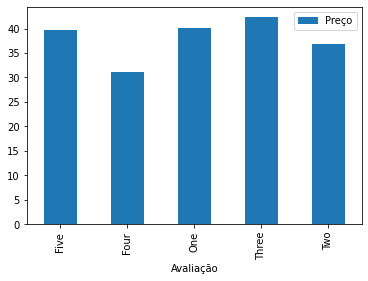

In [81]:
df.groupby('Avaliação').mean().plot(kind='bar')

### Intervalos de preço

In [82]:
df['Intervalo Preço'] = pd.cut(df['Preço'], bins=[0, 10, 20, 30, 40, 50, 60])

In [83]:
df

,Título,Avaliação,Preço,Intervalo Preço
0,A Light in the Attic,Three,51.77,"(50, 60]"
1,Tipping the Velvet,One,53.74,"(50, 60]"
2,Soumission,One,50.10,"(50, 60]"
3,Sharp Objects,Four,47.82,"(40, 50]"
4,Sapiens: A Brief History of Humankind,Five,54.23,"(50, 60]"
5,The Requiem Red,One,22.65,"(20, 30]"
6,The Dirty Little Secrets of Getting Your Dream...,Four,33.34,"(30, 40]"
7,The Coming Woman: A Novel Based on the Life of...,Three,17.93,"(10, 20]"
8,The Boys in the Boat: Nine Americans and Their...,Four,22.60,"(20, 30]"
9,The Black Maria,One,52.15,"(50, 60]"


<AxesSubplot:xlabel='Intervalo Preço'>

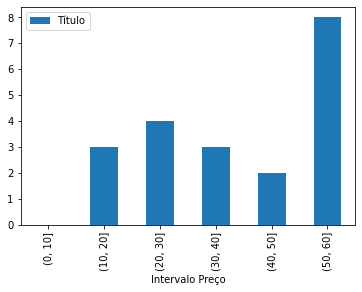

In [84]:
df[['Intervalo Preço', 'Título']].groupby('Intervalo Preço').count().plot(kind='bar')